# Imports

In [8]:
import scipy as sp
import numpy as np
import matplotlib as plot
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
set_option('display.width',100)
set_option('display.precision',3)
import sklearn
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
iris_bunchObject = load_iris()

# Chap 5

### Descriptive Statistics

In [15]:
type(iris_bunchObject)
dir(iris_bunchObject)

sklearn.utils._bunch.Bunch

In [203]:
# Creating a Pandas Dataframe
iris = pd.DataFrame(iris_bunchObject.data, columns=iris_bunchObject.feature_names)
iris['target'] = iris_bunchObject.target
iris['target_name'] = iris['target'].map(dict(enumerate(iris_bunchObject.target_names)))

In [ ]:
print(type(iris))
print(iris.head())

In [ ]:
print(iris.head(1))
print(iris.shape)
print(iris.dtypes)
print(iris.describe())

### Correlations

In [41]:
iris.select_dtypes(include=[np.number]).corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000,-0.118,0.872,0.818,0.783
sepal width (cm),-0.118,1.000,-0.428,-0.366,-0.427
petal length (cm),0.872,-0.428,1.000,0.963,0.949
petal width (cm),0.818,-0.366,0.963,1.000,0.957
target,0.783,-0.427,0.949,0.957,1.000


In [42]:
iris.select_dtypes(include=[np.number]).skew()

sepal length (cm)    0.315
sepal width (cm)     0.319
petal length (cm)   -0.275
petal width (cm)    -0.103
target               0.000
dtype: float64

# Chap 6

### Visualisations
### Univariate

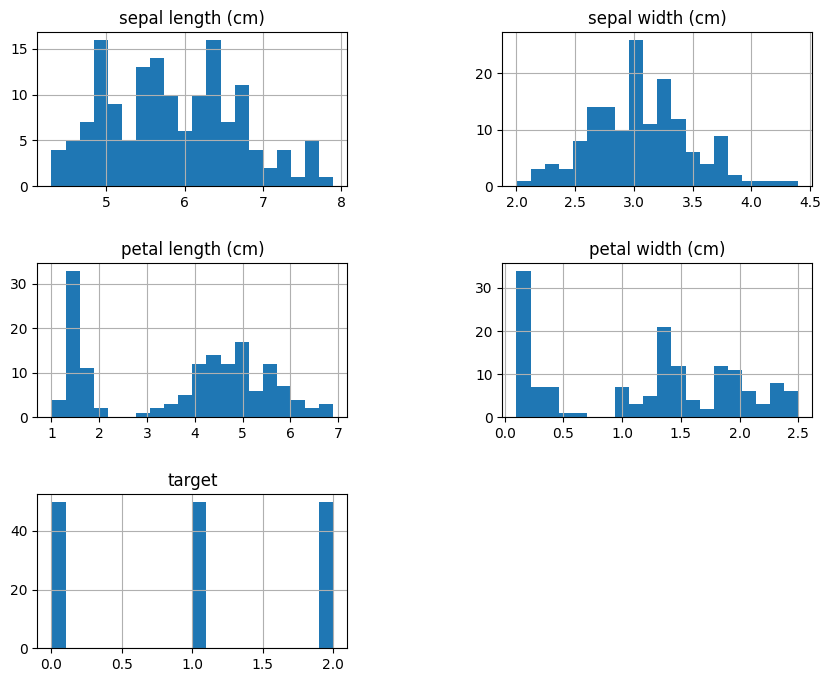

In [45]:
iris.hist(figsize=(10, 8), bins=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

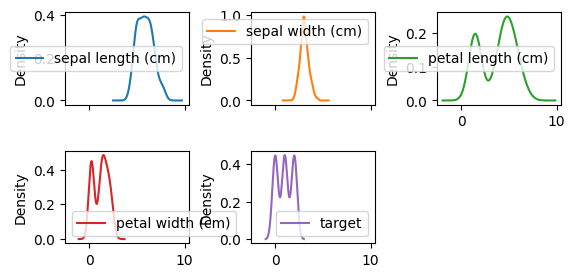

In [47]:
iris.plot(kind='density', subplots=True, layout=(3,3), sharex=True)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

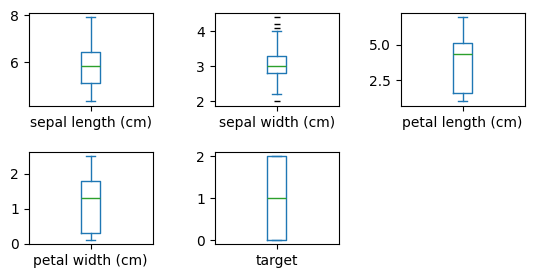

In [49]:
iris.plot(kind='box', subplots=True, layout=(3,3), sharex=True, flierprops=dict(marker='_', color='red', markersize=5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Multivariate 

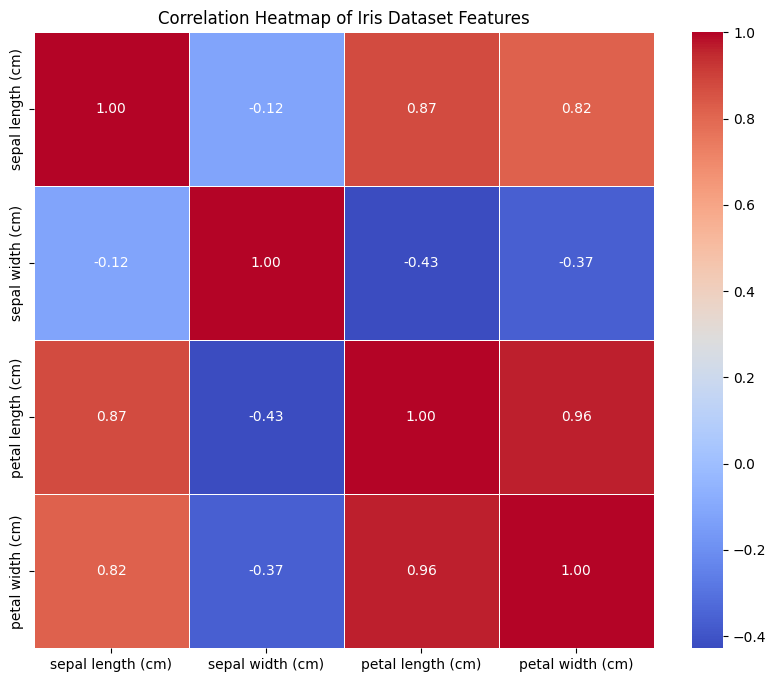

In [59]:
import seaborn as sns
correlation_matrix = iris.drop(columns=['target','target_name']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()

### Scatterplot Matrix

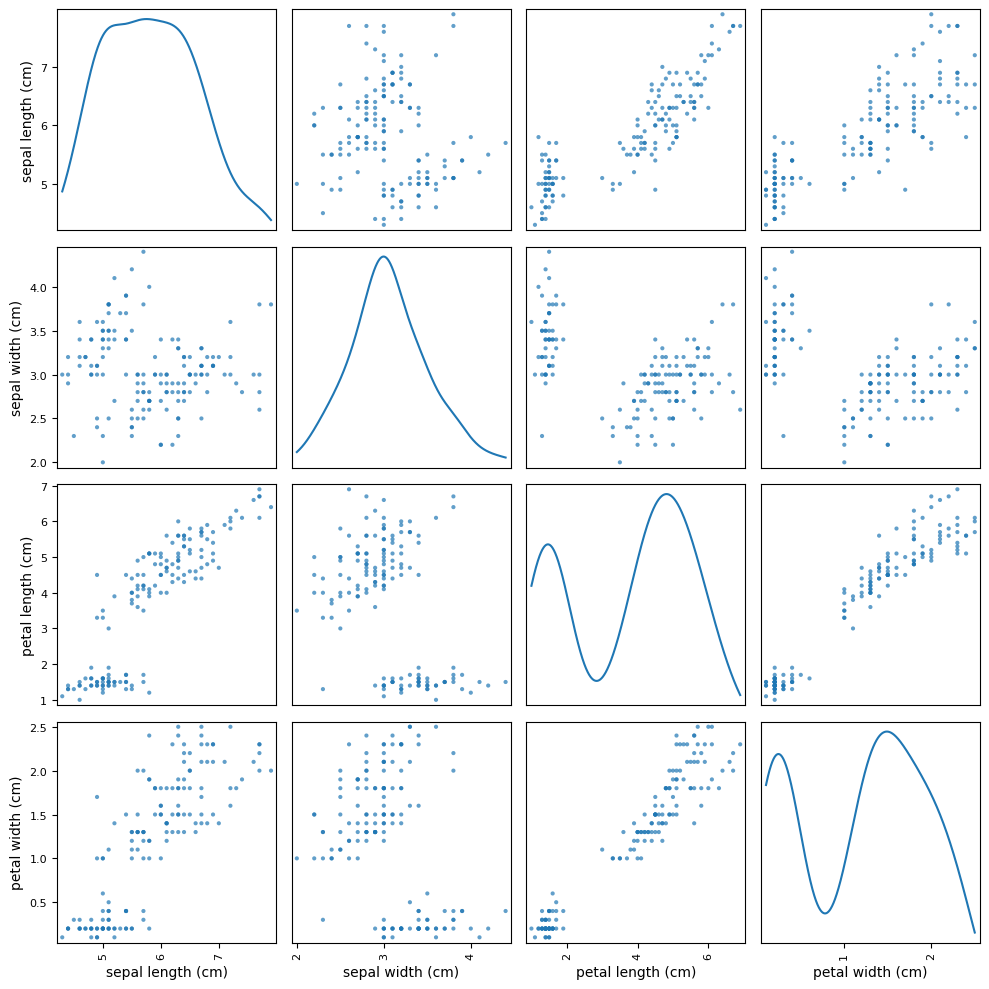

In [62]:
scatter_matrix(iris.drop(columns=['target']), figsize=(10, 10), diagonal='kde', alpha=0.7, grid=True)
plt.tight_layout()
plt.show()

# Chap 7
### MinMaxScaler (Rescale)
- Transform / pre-processing tool
- If dataset attributes vary significantly - we can rescale all the values between 0 and 1
- Referred to as normalization
- Good for optimization algorithms like gradient decent;
- Also algorithms that weight inputs like regression and neural networks and distance based measures like KNN

In [63]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
set_printoptions(precision=3)
scalar = MinMaxScaler(feature_range=(0,1))

In [69]:
irisNumeric = iris.drop(columns=['target','target_name'])
scaler = MinMaxScaler()
scaler.fit(irisNumeric)

MinMaxScaler()

In [72]:
iris_scaled = scaler.transform(irisNumeric)

In [75]:
iris_scaled[1]

array([0.167, 0.417, 0.068, 0.042])

In [82]:
# Convert scaled array back to DataFrame with appropriate column names
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.drop(columns=['target','target_name']).columns)
print(iris_scaled_df.iloc[0])

sepal length (cm)    0.222
sepal width (cm)     0.625
petal length (cm)    0.068
petal width (cm)     0.042
Name: 0, dtype: float64


### Iris Selected Columns

In [83]:
irisNumeric = iris.drop(columns=['target','target_name'])

### Standardize (StandardScaler)

In [84]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(irisNumeric)

StandardScaler()

In [87]:
iris_scaled = scalar.transform(irisNumeric)
print(iris_scaled.shape)
print(iris_scaled[1])

(150, 4)
[-1.143 -0.132 -1.34  -1.315]


In [88]:
# Convert scaled array back to DataFrame with appropriate column names
iris_rescaled_df = pd.DataFrame(iris_scaled, columns=irisNumeric.columns)
print(iris_rescaled_df.iloc[0])

sepal length (cm)   -0.901
sepal width (cm)     1.019
petal length (cm)   -1.340
petal width (cm)    -1.315
Name: 0, dtype: float64


### Normalizer (Normalize Data)
- Unit Vector of 1.

In [89]:
from sklearn.preprocessing import Normalizer
set_printoptions(precision=3)

In [90]:
scaler = Normalizer()
scaler.fit(irisNumeric)

Normalizer()

In [91]:
iris_scaled = scaler.transform(irisNumeric)
print(iris_scaled.shape)
print(iris_scaled[1])

(150, 4)
[0.828 0.507 0.237 0.034]


In [92]:
# Convert scaled array back to DataFrame with appropriate column names
iris_rescaled_df = pd.DataFrame(iris_scaled, columns=irisNumeric.columns)
print(iris_rescaled_df.iloc[0])

sepal length (cm)    0.804
sepal width (cm)     0.552
petal length (cm)    0.221
petal width (cm)     0.032
Name: 0, dtype: float64


### Binarize 

In [93]:
from sklearn.preprocessing import Binarizer
scaler = Binarizer()

In [22]:
scaler.fit(irisNumeric)

NameError: name 'scaler' is not defined

In [95]:
iris_scaled = scaler.transform(irisNumeric)
print(iris_scaled.shape)
print(iris_scaled[1])

(150, 4)
[1. 1. 1. 1.]


In [96]:
# Convert scaled array back to DataFrame with appropriate column names
iris_rescaled_df = pd.DataFrame(iris_scaled, columns=irisNumeric.columns)
print(iris_rescaled_df.iloc[0])

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
Name: 0, dtype: float64


# Chap 8 

### Feature Selection
- Reduces overfitting
- Improves accuracy
- Reduces training time

### Univariate Selection
- Statistical tests are used to select features with the strongest relationship with the output variable.
- Involves using:
  - **SelectKBest**
  - **f_classi** and **f_regression** functions
  - ANOVA F-value; Analysis of variance

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression

In [98]:
print(iris.shape)

(150, 6)


In [99]:
X = iris.drop(columns=['target','target_name'])
print(X.shape)
y = iris['target_name']
print(y.shape)

(150, 4)
(150,)


### SelectKBest

In [104]:
selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X, y)

SelectKBest(k=2)

In [107]:
fit = selector.fit(X, y)

In [108]:
fit.scores_

array([ 119.265,   49.16 , 1180.161,  960.007])

In [109]:
features = fit.transform(X)
features.shape

(150, 2)

In [113]:
X.columns[selector.get_support()]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

### Recursive Feature Selection
- Recursively removes attributes and building a model
- Uses model accuracy in determining the attributes that contribute most

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()

In [118]:
X = iris.drop(columns=['target','target_name'])
print(X.shape)
y = iris['target']
print(y.shape)

(150, 4)
(150,)


In [121]:
rfe = RFE(estimator=model, n_features_to_select=2)
fit = rfe.fit(X, y)

In [122]:
print(X.columns[fit.support_])

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


### Principle Component Analysis
- Uses linear algebra to transform the dataset into a compressed form
- Known as a **data reduction technique**
- Choose the number of dimensions or principle components in the transformed result.

- **PCA** is useful when you want to reduce dimensionality for visualization, to simplify models, or when working with high-dimensional data where many features may be correlated.
- **Feature selection methods** are more appropriate when you need to identify the most relevant features for predictive modeling, especially when interpretability of the model is important.

In [161]:
from sklearn.decomposition import PCA

In [176]:
pca_transformer = PCA(n_components=2)

In [174]:
X = iris.drop(columns=['target','target_name'])
print(X.shape)
y = iris['target']
print(y.shape)

(150, 4)
(150,)


In [177]:
pca_transformer.fit(X)

PCA(n_components=2)

In [181]:
pca_transformer.components_


array([[ 0.361, -0.085,  0.857,  0.358],
       [ 0.657,  0.73 , -0.173, -0.075]])

In [182]:
X_reduced = pca_transformer.transform(X)

In [184]:
X_reduced.shape

(150, 2)

In [187]:
print(X.head(1))
print(X_reduced[1])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
[-2.714 -0.177]


In [191]:
X_reduced = pd.DataFrame(X_reduced)

### Visualize PCA

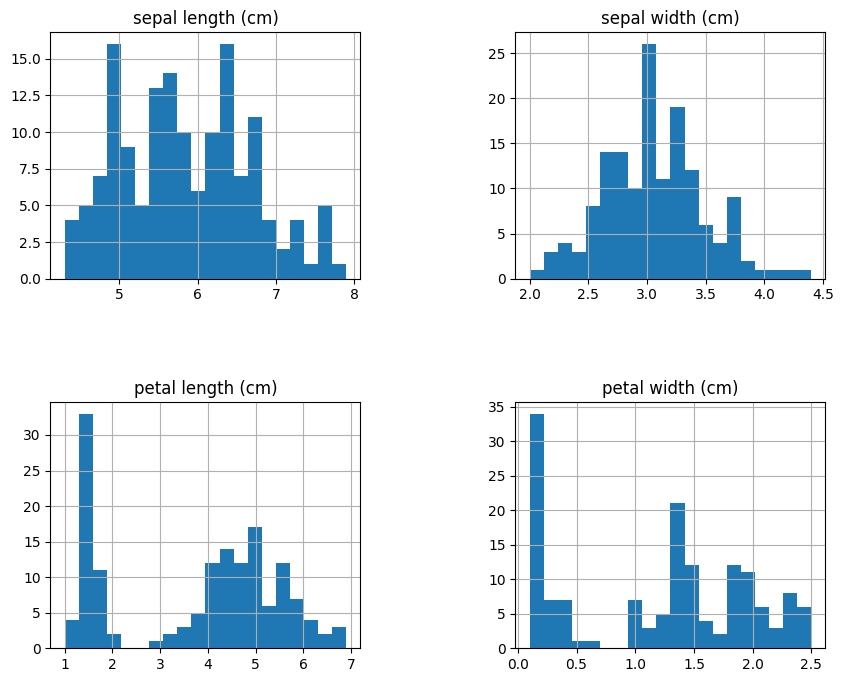

In [194]:
X.hist(figsize=(10, 8), bins=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

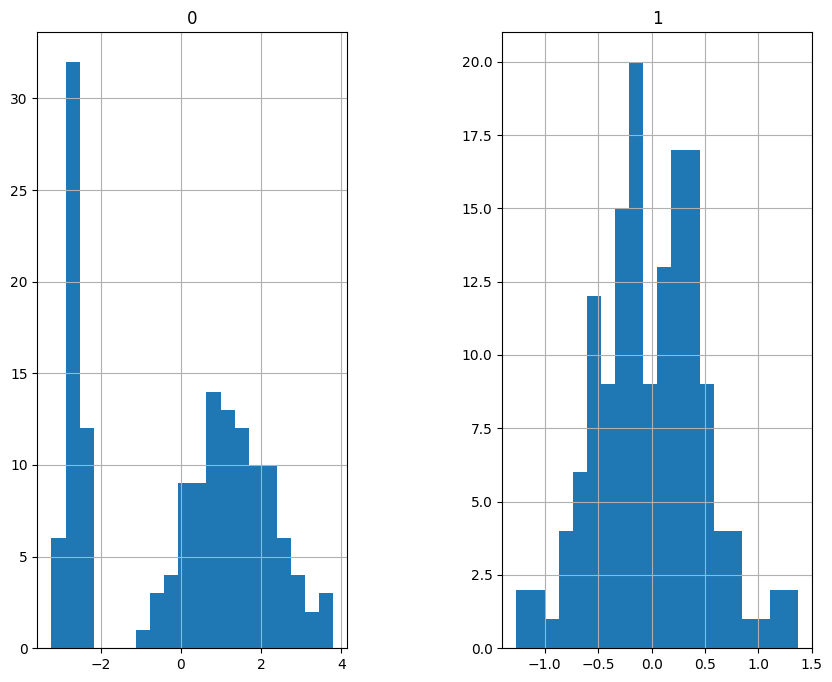

In [193]:
X_reduced.hist(figsize=(10, 8), bins=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

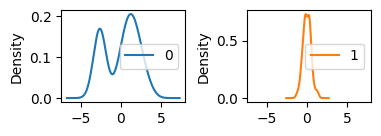

In [195]:
X_reduced.plot(kind='density', subplots=True, layout=(3,3), sharex=True)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

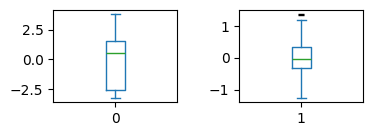

In [196]:
X_reduced.plot(kind='box', subplots=True, layout=(3,3), sharex=True, flierprops=dict(marker='_', color='red', markersize=5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

#### Multivariate 

In [ ]:
import seaborn as sns
correlation_matrix = X_reduced.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()

#### Scatterplot Matrix

In [ ]:
scatter_matrix(X_reduced, figsize=(10, 10), diagonal='kde', alpha=0.7, grid=True)
plt.tight_layout()
plt.show()

## Feature Importance Attribute
- Not all models have this attribute

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = iris.data
y = iris.target

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

print("Feature importances:", importances)
import matplotlib.pyplot as plt
features = iris.feature_names
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances from ExtraTreesClassifier')
plt.show()

# Chapter 9
- **Evaluation the performance of Machine learning algorithms with resampling**
- Train and Test Sets
- K-Fold Cross Validation
- Leave One Out Cross Validation
- Repeated Random Test-Train Splits

### : Two ways to evaluate algorithms
1. Make predictions for data you already have the target for
2. Use techniques from statistics called **resampling methods** that allow you to make accurate estimates for how well your algorithm will perform on new data

### : New Terms
- What are **resampling methods**?
- "Model evaluation" is an estimate, not a guarantee of performance
- Once we estimate the performance of our algorithm, we can then **re-train** the **final algorithm** on the **entire training dataset** and get it ready for operational use.

### Split into Train and Test Sets
- The simplest method
- Used to evaluate the performance of an algorithm
- Fast and ideal for large datasets and slow algorithms
- Ensure that both splits are representative of the underlying problem
- Use the random_seed parameter to ensure the split is exactly the same when testing different algorithms

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Declare X and y

In [9]:
iris = pd.DataFrame(iris_bunchObject.data, columns=iris_bunchObject.feature_names)
iris['target'] = iris_bunchObject.target
iris['target_name'] = iris['target'].map(dict(enumerate(iris_bunchObject.target_names)))

X = iris_bunchObject.data
y = iris_bunchObject.target

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [212]:
model = LogisticRegression(solver='liblinear')

In [213]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [214]:
model.score(X_test, y_test)

0.868421052631579

### K-Fold Cross Validation
- This approach has less variance than the single Train_Test_Split function
- Split the data in k number of parts, each part is called a **fold**
- The algorithm is trained on k-1 of the parts then tested on the left out **test fold**
- This is repeated for each number of **folds**
- Each **test fold** has a performance score that is summarized using a **mean** and **standard deviation**
- The result of this is a more reliable estimate of the performance of the algorithm on **new data**
- Because; the algorithm is trained and evaluated multiple times of different data
- Be aware of the **k** value, it should be large enough to represent the problem, but allowing enough repetitions
- Datasets in the thousands; *k* values of 3, 5 and 10 are common...

In [221]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [218]:
X = iris_bunchObject.data
y = iris_bunchObject.target

In [265]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [241]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [259]:
from sklearn.svm import SVC
model = SVC() 

In [256]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [263]:
from sklearn.neural_network import MLPClassifier
model  = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [266]:
results = cross_val_score(model, X, y, cv=KFold(n_splits=10, random_state=0, shuffle=True))
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100.0))
print("Standard Deviation: %.2f%%" % (results.std()*100.0))

[1.    0.933 0.867 0.867 0.933 1.    0.933 1.    1.    0.933]
Accuracy: 94.67%
Standard Deviation: 4.99%


### Leave One Out

In [271]:
from sklearn.model_selection import LeaveOneOut
results = cross_val_score(model, X, y, cv=LeaveOneOut())
print(len(X))
print(len(results))
print((results))
print("Accuracy: %.2f%%" % (results.mean()*100.0))
print("Standard Deviation: %.2f%%" % (results.std()*100.0))

150
150
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy: 95.33%
Standard Deviation: 21.09%


### Repeated Random Test-Train Splits 

In [272]:
from sklearn.model_selection import ShuffleSplit

In [279]:
model = LogisticRegression(solver='liblinear')

In [274]:
results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.33, random_state=7))
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.800% (2.600%)


# Chap 10 - Classification Metrics
- Classification problems are perhaps the most common type of machine learning problem.

In [283]:
model = LogisticRegression(solver='liblinear')
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

In [289]:
results = cross_val_score(model, X, y, cv=kFold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.333% (8.459%)


In [293]:
results = cross_val_score(model, X, y)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.000% (3.887%)


### Accuracy
- The most common evaluation metric, but also the most misused
- Accuracy is the number of correct predictions made as a ratio of all predictions made
- It is really only suitable when there's an equal number of observations in each class (which is rare).
- And also that all predictions and incorrect predictions are equally important, which is also rare.

In [300]:
scoring = 'accuracy'
results = cross_val_score(model, X, y, scoring = scoring)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results

Accuracy: 96.000% (3.887%)


array([1.   , 0.967, 0.933, 0.9  , 1.   ])

### Logistic Loss
- Evaluates the predictions of probabilities
- Measures confidence
- Bit lost on this one

In [299]:
scoring = 'neg_log_loss'
results = cross_val_score(model, X, y, scoring=scoring)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results

Accuracy: -32.945% (2.556%)


array([-0.327, -0.302, -0.356, -0.362, -0.302])

### !! Area Under ROC Curve
- **Need to revisit this topic**
- **Binary Classification Problem**
  - Receiver Operating Characteristic - Area Under Curve
  - It calculates how well the model can distinguish between two classes  
- **Multi-Class Classification Problem**
  - One-vs-One (ovo): Compare every class with every other class
  - One-vs-Rest (ovr): Compare each class with all others combined

In [313]:
scoring = 'roc_auc'
scoring = 'roc_auc_ovo'
scoring = 'roc_auc_ovr'

results = cross_val_score(model, X, y, scoring=scoring)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results

Accuracy: 98.833% (1.325%)


array([1.   , 0.997, 0.977, 0.968, 1.   ])

### Confusion Matrix

In [315]:
from sklearn.metrics import confusion_matrix

In [316]:
X = iris_bunchObject.data
y = iris_bunchObject.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [317]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [318]:
predicted = model.predict(X_test)

In [325]:
confusion_matrix(y_test, predicted) # Note order of paramters

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  0,  9]], dtype=int64)

### Classification Report

In [327]:
from sklearn.metrics import classification_report

In [329]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.69      0.81        16
           2       0.64      1.00      0.78         9

    accuracy                           0.87        38
   macro avg       0.88      0.90      0.87        38
weighted avg       0.92      0.87      0.87        38



# Chap 11 - Spot Check
- "Spot-checking" is a way to find out which algorithms perform best on for your problem / dataset
- You cannot know what algorithms are best suited to your problem beforehand
- Trial a number of methods and identify the ones with most potential
- Trial and error to discover a number of algorithms to shortlist and then tune further
- This whole process is called "spot-checking"
- Instead of asking "What algorithm should I use on my dataset" we should be asking "What *algorithms* should I *spot-check* on my dataset"
- Try a mixture of algorithms and see what is good at picking out the **structure** in your dataset

**Suggestions**
- Try a mixture of algorithm representations 
  - e.g. instances and trees
- Try a mixture of learning algorithms
  - e.g. different algorithms for learning the same type of representation
- Try a mixture of modeling types 
  - e.g. linear and nonlinear functions or parametric and nonparametric

**Algorithm overview**
- Classification algorithms
  - Linear Algorithms
    - Logistic Regression
    - Linear Discriminant Analysis
  - Non-Linear Algorithms
    - KNN
    - Naive Bayes
    - Classification and Regression Trees - CART
    - Support Vector Machines

# Chap 13 Compare Algorithms

In [2]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
iris = pd.DataFrame(iris_bunchObject.data, columns=iris_bunchObject.feature_names)
iris['target'] = iris_bunchObject.target
iris['target_name'] = iris['target'].map(dict(enumerate(iris_bunchObject.target_names)))

X = iris_bunchObject.data
y = iris_bunchObject.target

In [4]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [6]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.953333 (0.084591)
LDA: 0.980000 (0.030551)
KNN: 0.953333 (0.052068)
CART: 0.953333 (0.052068)
NB: 0.953333 (0.066999)
SVM: 0.960000 (0.053333)


In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Chap 14 - Pipelines
- Used to minimize data leakage
- Construct a data preparation and modelling pipeline
- Construct a feature extraction and modelling pipeline

### Data preparation and Modeling pipeline

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
type(estimators)
estimators

[('standardize', StandardScaler()), ('lda', LinearDiscriminantAnalysis())]

In [4]:
model = Pipeline(estimators)

In [5]:
type(model)
model

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [13]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)

In [19]:
results

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93333333, 0.93333333, 1.        ])

In [14]:
results.mean()

0.9800000000000001

### Feature Extraction and Modeling Pipeline

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [20]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=4)))
feature_union = FeatureUnion(features)

In [24]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)

In [25]:
model

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                                                ('select_best',
                                                 SelectKBest(k=4))])),
                ('logistic', LogisticRegression(solver='liblinear'))])

In [23]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())
print(results)

0.9466666666666667
[0.73333333 0.86666667 1.         1.         1.         1.
 1.         0.93333333 0.93333333 1.        ]


# Chap 15 Improve Performance with Ensembles

### Bagging Algorithms

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

In [32]:
model = BaggingClassifier(n_estimators=num_trees, random_state=seed)

In [33]:
results = cross_val_score(model, X, y, cv=kfold)

In [35]:
print(results)
print(results.mean())

[0.86666667 0.86666667 1.         1.         1.         1.
 1.         0.93333333 0.93333333 1.        ]
0.96


# Chap 16 Algorithm Tuning

In [36]:
import numpy
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha = alphas)
model = RidgeClassifier()

In [43]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 3)

In [44]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RidgeClassifier(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)


0.8133333333333335
1.0


### Random Search Parameter Tuning

In [48]:
from scipy.stats import uniform
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [49]:
param_grid = {'alpha': uniform()}
model = RidgeClassifier()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, random_state=7)

In [50]:
rsearch.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RidgeClassifier(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000244EDF0FBE0>},
                   random_state=7)

In [52]:
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.8133333333333335
0.9779895119966027


# Chap 17 - Save and load

In [53]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(solver='liblinear')

In [56]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [57]:
filename = 'finalized_Model.sav'
dump(model, open(filename, 'wb'))

In [59]:
loaded_model = load(open(filename, 'rb'))
loaded_model.score(X_test, y_test)

0.9473684210526315

# Chap 18 - Predictive Modelling Project Template

- Applied Machine Learning is an empirical skill
- You have to practice, reading books and articles won't do
- Below is a 6 step ML template
- This section covers:
  - How to structure an end-to-end predictive modeling project
  - How to map the tasks I've learned about so far in Part II onto a project
  - How to best structure the project template to ensure an accurate results for my dataset


### Practice ML with projects
- working through a project end-to-end is critically important
- Applied ML will not come alive to me until I work through a dataset from beginning to end
- Working through a project will force me to think about how the model will be used
- Challenge my assumptions
- Get good at all parts of a project, not just my favorite parts
- Use standardized datasets from UCI Machine Learning Repository
- University of California, Irvine

### 18.1.1 Use a structured step by step process
1. Define the problem
2. Summarize data
3. Prepare data
4. Evaluate algorithms
5. Improve results
6. Present results
- To work through predictive modelling machine learning problems with Python, I need to map Python onto this process